In [82]:
import nltk
import pandas as pd
import os 
from tabulate import tabulate

In [2]:
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk.corpus import ieer
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\azg526\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
import nltk.data
from nltk.corpus.reader.api import *
from nltk.corpus.reader.util import *
from nltk.tokenize import *
#from https://www.nltk.org/_modules/nltk/corpus/reader/plaintext.html

In [55]:
#from https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da
from nltk.tag import pos_tag

In [74]:
import spacy
from spacy import displacy
from collections import Counter

!python -m spacy download es_core_news_lg
import es_core_news_lg
nlp=es_core_news_lg.load()

     -------------------------------------- 568.0/568.0 MB 2.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


In [4]:
#%pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sa = SentimentIntensityAnalyzer()

In [12]:
import matplotlib.pyplot as plot

El Corrido de Gregorio Cortez 
by Diane Lopez
Septemeber 8 2022
text analysis sentiment and gis project

NLTK and Vader Sentiment Analyzer

In [5]:
#reading text file
text = open("corrido corpus\gregoriocortez_es_corrido.txt", encoding="utf-8").read()
# Replace line breaks with spaces
text = text.replace('\n', ' ')

for number, sentence in enumerate(nltk.sent_tokenize(text)):
    print(number, sentence)
 # Break text into sentences
sentences = nltk.sent_tokenize(text)

0 En el condado El Carmen miren lo que ha sucedido, murió el Cherife Mayor, quedando Román herido.
1 Se anduvieron informando como media hora después supieropn que el malhechor era Gregorio Cortez.
2 Ya insortaron a Cortez por toditito el estado, que vivo o muerto se aprehenda proque a various ha matado.
3 Decía Gregorio Cortez con su pistola en la mano: No siento haberlo matado, lo que siento es a mi hermano.
4 Decía Gregorio Cortez con su almu my encendid: No siento haberlo matado, la defensa es permitida.
5 Venían los american mas blancos que una amapola, de miedo que le tenían a Cortez con su pistola.
6 Decían los americanos, decían con timidez: Vamos a seguir la huella que el malhechor es Cortez.
7 Soltaron los perros juanes pa'que siguieran la huella, pero alcanzar a Cortez.
8 Tiró con rumbo a Gonzales sin ninguna timidez: Síganme, rinches cobardes, yo soy Gregorio Cortez.
9 Se fue de Belmont al rancho, lo alcanzaron a rodear, poquitos más de trescientos, y allí les brincó el cor

In [6]:
# Make empty list
sentence_scores = []
# Get each sentence and sentence number, which is what enumerate does
for number, sentence in enumerate(sentences):
    # Use VADER to calculate sentiment
    scores = sa.polarity_scores(sentence)
    # Make dictionary and append it to the previously empty list
    sentence_scores.append({'sentence': sentence, 'sentence_number': number+1, 'sentiment_score': scores['compound']})
pd.DataFrame(sentence_scores)
 # Assign DataFrame to variable red_df
 # 10 most negative sentence
greg_df = pd.DataFrame(sentence_scores)
greg_df

,sentence,sentence_number,sentiment_score
0,En el condado El Carmen miren lo que ha sucedi...,1,0.3400
1,Se anduvieron informando como media hora despu...,2,0.0000
2,"Ya insortaron a Cortez por toditito el estado,...",3,0.3400
3,Decía Gregorio Cortez con su pistola en la man...,4,-0.2960
4,Decía Gregorio Cortez con su almu my encendid:...,5,-0.2960
5,Venían los american mas blancos que una amapol...,6,0.0000
6,"Decían los americanos, decían con timidez: Vam...",7,0.0000
7,Soltaron los perros juanes pa'que siguieran la...,8,0.0000
8,Tiró con rumbo a Gonzales sin ninguna timidez:...,9,-0.5574
9,"Se fue de Belmont al rancho, lo alcanzaron a r...",10,0.0000


Run analysis on sentiment scores 

In [7]:
# Sort by the column "sentiment_score" and slice for first 10 values
# 10 negative sentence_scores
greg_df.sort_values(by='sentiment_score')[:10]

,sentence,sentence_number,sentiment_score
8,Tiró con rumbo a Gonzales sin ninguna timidez:...,9,-0.5574
25,"Decía Gregorio Cortez, decía en su voz divina:...",26,-0.2960
24,"Decía Gregorio Cortez, les gritaba en alta voz...",25,-0.2960
3,Decía Gregorio Cortez con su pistola en la man...,4,-0.2960
4,Decía Gregorio Cortez con su almu my encendid:...,5,-0.2960
23,Decía el Cheride Mayor como queriendo llorar: ...,24,-0.2960
19,Dicen que por culpa mía han matado mucha gente...,20,-0.2960
11,Decía Gregorio Cortez con su pistola en la man...,12,-0.2960
12,"Salió Gregorio Cortez, salió con rumbo a Lared...",13,-0.2960
14,No me pueden agarrar ni con esos perros juanes.,15,-0.2960


In [8]:
# 10 positive sentence_scores
 # Sort by the column "sentiment_score," this time in descending order, and slice for first 10 values

greg_df.sort_values(by='sentiment_score', ascending=False)[:18]
 

,sentence,sentence_number,sentiment_score
0,En el condado El Carmen miren lo que ha sucedi...,1,0.34
2,"Ya insortaron a Cortez por toditito el estado,...",3,0.34
17,Decía Gregorio Cortez echando muchos balazos: ...,18,0.34
13,Decía Gregorio Cortez: Pa' qué se velen de pla...,14,0.00
26,"Ya agarron a Cortez, ya terminó la cuestion, l...",27,0.00
22,Cuando rodearon la case Cortez se les presentó...,23,0.00
21,"Venían todos los rinches, venían que hasta vol...",22,0.00
20,"Cortez le dice a Jesús: Oro sí lo vas a ver, a...",21,0.00
18,"Ya se encontrá a un mexicano, le dice con alti...",19,0.00
16,"Allá por El Encinal, según lo que aquí se dice...",17,0.00


Plotting scores 

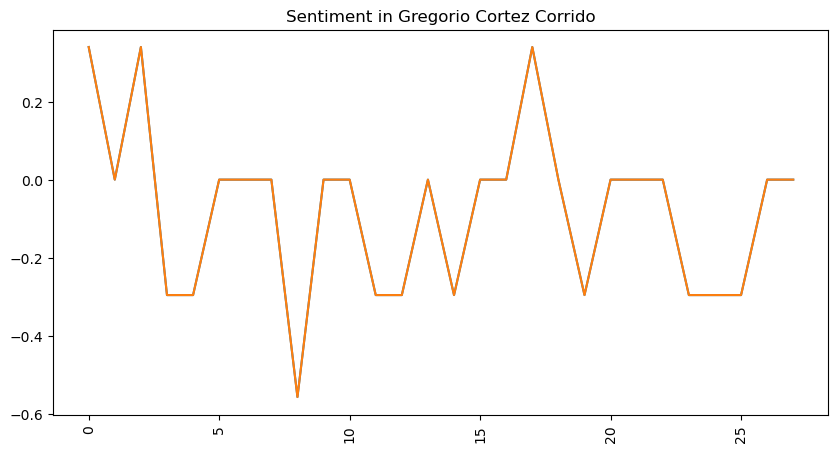

In [13]:
## Make a sentiment plot
greg_df['sentiment_score'].plot();
 
senitimentPlotGreg = greg_df['sentiment_score'].plot(x='sentence_number', y='sentiment_score', kind='line',
                        figsize=(10,5), rot=90, title='Sentiment in Gregorio Cortez Corrido')

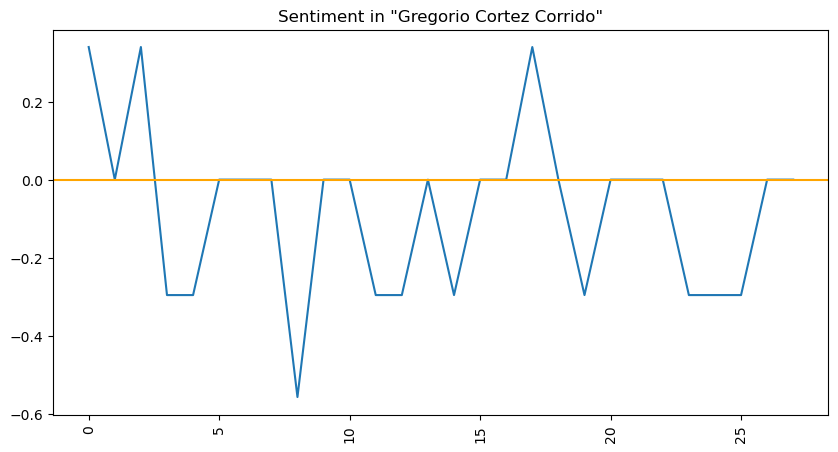

In [14]:
 # Get averages for a rolling window, then plot
greg_df.rolling(1)['sentiment_score'].mean().plot(x='sentence_number', y='sentiment_score', kind='line',
                        figsize=(10,5), rot=90, title='Sentiment in "Gregorio Cortez Corrido"')

# Plot a horizontal line at 0
plot.axhline(y=0, color='orange', linestyle='-');

Stop Words? from https://pythonspot.com/nltk-stop-words/

In [52]:
greg_file = '''En el condado El Carmen miren lo que ha sucedido, murió el Cherife Mayor, quedando Román herido.
Se anduvieron informando como media hora después supieropn que el malhechor era Gregorio Cortez.
Ya insortaron a Cortez por toditito el estado, que vivo o muerto se aprehenda proque a various ha matado.
Decía Gregorio Cortez con su pistola en la mano: No siento haberlo matado, lo que siento es a mi hermano.
Decía Gregorio Cortez con su almu my encendid: No siento haberlo matado, la defensa es permitida.
Venían los american mas blancos que una amapola, de miedo que le tenían a Cortez con su pistola.
Decían los americanos, decían con timidez: Vamos a seguir la huella que el malhechor es Cortez.
Soltaron los perros juanes pa'que siguieran la huella, pero alcanzar a Cortez.
Tiró con rumbo a Gonzales sin ninguna timidez: Síganme, rinches cobardes, yo soy Gregorio Cortez.
Se fue de Belmont al rancho, lo alcanzaron a rodear, poquitos más de trescientos, y allí les brincó el corral.
Cuando les brincó el corral, según lo que aquí se dice, se agarraron a balazos, y les mató otro cherife.
Decía Gregorio Cortez con su pistola en la mano: No corran, rinches cobardes, con un solo mexicano.
Salió Gregorio Cortez, salió con rumbo a Laredo, no lo quisieron seguir porque le tuvieron miedo.
Decía Gregorio Cortez: Pa' qué se velen de planes? No me pueden agarrar ni con esos perros juanes.
Decían Los americanos: Si lo alcanzamos por derecho myu poquitos volveremos.
Allá por El Encinal, según lo que aquí se dice, le formaron un corral y les mató otro cherife.
Decía Gregorio Cortez echando muchos balazos: Me ha escapado de aquaceros, contimás de nublinazos.
Ya se encontrá a un mexicano, le dice con altivez: Platícame qué hay de nuevo, yo soy Gregorio Cortez.
Dicen que por culpa mía han matado mucha gente, pues ya me voy a entregar porque eso no es convieniente.
Cortez le dice a Jesús: Oro sí lo vas a ver, anda diles los rinches que vengan a aprehender.
Venían todos los rinches, venían que hasta volaban, porque se iban a ganer diez mil pesos que le daban.
Cuando rodearon la case Cortez se les presentó: Por la buena sí me llevan proque de otro modo no.
Decía el Cheride Mayor como queriendo llorar: Cortez, entrega tus armas, no te vamos a matar.
Decía Gregorio Cortez, les gritaba en alta voz: Mis armas no las entrego hasta estar en calaboz.
Decía Gregorio Cortez, decía en su voz divina: Mis armas no las entrgo hasta estar en bartolina.
Ya agarron a Cortez, ya terminó la cuestion, la pobre de sui familia lo lleva en el corazón.
Ya con esta me despido a la sombra de un ciprés, aquí se acaba el corrido de don Gregorio Cortez.'''
corpus = PlaintextCorpusReader( path_corridos, greg_file)
corpus

<PlaintextCorpusReader in 'c:\\Users\\azg526\\Documents\\GitHub\\Corridos'>

In [53]:
stop_words = []
# The filename of the custom data/stop_words.csv file

if os.path.exists(greg_file):
    #import csv
    with open(greg_file, 'r', encoding="utf-8") as f:
        stop_words = list(f)[0:27]
    print('Custom stopwords list loaded from doc')
else:
    # Load the NLTK stopwords list
    from nltk.corpus import stopwords
    stop_words = stopwords.words('spanish')
    print('NLTK stopwords list loaded')

print(stop_words)

NLTK stopwords list loaded
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'esta

In [54]:
#the var stopWords contains ## stop words
stopWords = set(stopwords.words('spanish'))
words = word_tokenize(greg_file)
wordsFiltered = []

for w in words:
    if w not in stopWords:
        #wordsFiltered contains all words which are not stop words. 
        wordsFiltered.append(w)

print(wordsFiltered)


['En', 'condado', 'El', 'Carmen', 'miren', 'sucedido', ',', 'murió', 'Cherife', 'Mayor', ',', 'quedando', 'Román', 'herido', '.', 'Se', 'anduvieron', 'informando', 'media', 'hora', 'después', 'supieropn', 'malhechor', 'Gregorio', 'Cortez', '.', 'Ya', 'insortaron', 'Cortez', 'toditito', ',', 'vivo', 'muerto', 'aprehenda', 'proque', 'various', 'matado', '.', 'Decía', 'Gregorio', 'Cortez', 'pistola', 'mano', ':', 'No', 'siento', 'haberlo', 'matado', ',', 'siento', 'hermano', '.', 'Decía', 'Gregorio', 'Cortez', 'almu', 'my', 'encendid', ':', 'No', 'siento', 'haberlo', 'matado', ',', 'defensa', 'permitida', '.', 'Venían', 'american', 'mas', 'blancos', 'amapola', ',', 'miedo', 'Cortez', 'pistola', '.', 'Decían', 'americanos', ',', 'decían', 'timidez', ':', 'Vamos', 'seguir', 'huella', 'malhechor', 'Cortez', '.', 'Soltaron', 'perros', 'juanes', "pa'que", 'siguieran', 'huella', ',', 'alcanzar', 'Cortez', '.', 'Tiró', 'rumbo', 'Gonzales', 'ninguna', 'timidez', ':', 'Síganme', ',', 'rinches', 'c

NER?NLTK

In [60]:
def preprocess (sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [62]:
sent = preprocess(greg_file)
sent

[('En', 'NNP'),
 ('el', 'NN'),
 ('condado', 'NN'),
 ('El', 'NNP'),
 ('Carmen', 'NNP'),
 ('miren', 'VBD'),
 ('lo', 'JJ'),
 ('que', 'NN'),
 ('ha', 'NN'),
 ('sucedido', 'NN'),
 (',', ','),
 ('murió', 'FW'),
 ('el', 'FW'),
 ('Cherife', 'NNP'),
 ('Mayor', 'NNP'),
 (',', ','),
 ('quedando', 'NN'),
 ('Román', 'NNP'),
 ('herido', 'NN'),
 ('.', '.'),
 ('Se', 'NNP'),
 ('anduvieron', 'VBZ'),
 ('informando', 'NN'),
 ('como', 'NN'),
 ('media', 'NNS'),
 ('hora', 'VBP'),
 ('después', 'JJ'),
 ('supieropn', 'NN'),
 ('que', 'NN'),
 ('el', 'NN'),
 ('malhechor', 'NN'),
 ('era', 'NN'),
 ('Gregorio', 'NNP'),
 ('Cortez', 'NNP'),
 ('.', '.'),
 ('Ya', 'NNP'),
 ('insortaron', 'VBZ'),
 ('a', 'DT'),
 ('Cortez', 'NNP'),
 ('por', 'NN'),
 ('toditito', 'NN'),
 ('el', 'NN'),
 ('estado', 'NN'),
 (',', ','),
 ('que', 'JJ'),
 ('vivo', 'NN'),
 ('o', 'NN'),
 ('muerto', 'NN'),
 ('se', 'NN'),
 ('aprehenda', 'NN'),
 ('proque', 'NN'),
 ('a', 'DT'),
 ('various', 'JJ'),
 ('ha', 'NN'),
 ('matado', 'NN'),
 ('.', '.'),
 ('Decía', '

NER?SPACY

In [83]:
doc = nlp(greg_file)
print(tabulate([(X.text, X.label_)for X in doc.ents]))

-----------------------------  ----
condado El Carmen              LOC
Cherife Mayor                  LOC
Román herido                   PER
Gregorio Cortez                PER
Cortez                         PER
aprehenda proque               PER
Decía Gregorio Cortez          PER
Decía Gregorio Cortez          PER
Cortez                         PER
Cortez                         PER
Cortez                         PER
Tiró                           PER
Gonzales                       PER
Síganme, rinches cobardes, yo  MISC
Gregorio Cortez                PER
Belmont                        LOC
balazos                        PER
Decía Gregorio Cortez          PER
No corran, rinches cobardes    MISC
Gregorio Cortez                PER
Laredo                         LOC
Decía Gregorio Cortez: Pa'     PER
El Encinal                     LOC
Decía Gregorio Cortez          PER
aquaceros                      LOC
Platícame                      PER
Gregorio Cortez                PER
Cortez           

In [106]:
doc.user_data["title"] = "Greg Cortez"
displacy.render(nlp(str(sentences[0:28])), jupyter=True, style='ent')


In [107]:
doc.user_data["title"] = "Greg Cortez"
displacy.render(doc, style="ent", jupyter=True)